In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.nasnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.python.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import tempfile
import sys
import datetime
import time

from tensorflow.lite.python import schema_py_generated
if sys.version_info.major >= 3:
    import pathlib
else:
    import pathlib2 as pathlib
# schema_py_generated.Model

In [ ]:
!pip install tensorflow_model_optimization
import tensorflow_model_optimization as tfmot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 75.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [ ]:
!pip install keras-flops
from keras_flops import get_flops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from sklearn.utils.multiclass import unique_labels

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# 新段落

# 新段落

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

RuntimeError: ignored

ImportError: ignored

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
from keras.datasets import cifar10

In [ ]:
print(tf. __version__)

2.12.0


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
# session.close()

# 为确保pytorch运行 必须限制tf占用的内存
# config = ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.9
# # session = InteractiveSession().close()
# session = InteractiveSession(config=config)
# session.close()

In [ ]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [ ]:
def convert_bytes(size, unit=None):
    if unit == 'KB':
        return print('File size:' + str( round(size/ 1024, 3))+ 'kb')
    elif unit == 'MB':
        return print('File size:' + str( round(size/ (1024*1024), 3))+ 'Mb')
    else:
        return print('File size:' + str(size)+ 'bytes')

In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)
  size = os.path.getsize(zipped_file)
  print('File size:' + str( round(size/ (1024*1024), 3))+ 'Mb')
  return True

In [ ]:
def generate_train_data_from_directory(train_data_dir, image_target_size = 224, batch_size = 32, channels = 3, class_mode = 'categorical' ): 

    train_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
            train_data_dir ,
            target_size = (image_target_size, image_target_size),
            batch_size  = batch_size,
            class_mode  = class_mode)

    total_images = train_generator.n  
    steps = total_images//batch_size 
#iterations to cover all data, so if batch is 5, it will take total_images/5  iteration 

    train_images , train_labels = [] , []
    for i in range(steps):
        a , b = train_generator.next()
        train_images.extend(a) 
        train_labels.extend(b)
    
    return np.array(train_images), np.array(train_labels)

In [ ]:
def generate_test_data_from_directory(test_data_dir, image_target_size = 224, batch_size = 1, channels = 3, class_mode = 'categorical' ): 

    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
            test_data_dir ,
            target_size = (image_target_size, image_target_size),
            batch_size  = batch_size,
            class_mode  = class_mode)

    total_images = test_generator.n  
    steps = total_images//batch_size 
#iterations to cover all data, so if batch is 5, it will take total_images/5  iteration 

    test_images , test_labels = [] , []
    for i in range(steps):
        a , b = test_generator.next()
        test_images.extend(a) 
        test_labels.extend(b)
    
    return np.array(test_images), np.array(test_labels)

In [ ]:
def inference_integer_tflite(mode_path, num_test):
  interpreter = tf.lite.Interpreter(model_path=mode_path)

  interpreter.allocate_tensors()
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  print('input_details:  ', interpreter.get_input_details())
  print('output_details: ', interpreter.get_output_details())

  total_seen = 0
  num_correct = 0
  inference_time = []

  for batch in test.take(int(num_test)):
    image = batch[0].numpy()

    start_ms = time.time()
    image = np.expand_dims(image,0).astype(np.uint8)
    interpreter.set_tensor(interpreter.get_input_details()[0]["index"], image)
    interpreter.invoke()
    predictions = interpreter.get_tensor(interpreter.get_output_details()[0]["index"])

    elapsed_ms = time.time() - start_ms
    inference_time.append(elapsed_ms * 1000.0)

    if np.argmax(batch[1].numpy()) == np.argmax(predictions):
      num_correct += 1
    total_seen += 1

    if total_seen % 500 == 0:
        print("Accuracy after %i images: %f" %
              (total_seen, float(num_correct) / float(total_seen)))
        

  print('Num images: {0:}, Accuracy: {1:.4f}, Latency: {2:.2f} ms'.format(num_test,
                                                                         float(num_correct / total_seen),
                                                                         np.array(inference_time).mean()))

In [ ]:
def inference_tflite(mode_path, num_test):
  interpreter = tf.lite.Interpreter(model_path=mode_path)

  interpreter.allocate_tensors()
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  print('input_details:  ', interpreter.get_input_details())
  print('output_details: ', interpreter.get_output_details())

  total_seen = 0
  num_correct = 0
  inference_time = []

  for batch in test.take(int(num_test)):
    image = batch[0].numpy()

    start_ms = time.time()
    image = np.expand_dims(image,0).astype(np.float32)
    interpreter.set_tensor(interpreter.get_input_details()[0]["index"], image)
    interpreter.invoke()
    predictions = interpreter.get_tensor(interpreter.get_output_details()[0]["index"])

    elapsed_ms = time.time() - start_ms
    inference_time.append(elapsed_ms * 1000.0)

    if np.argmax(batch[1].numpy()) == np.argmax(predictions):
      num_correct += 1
    total_seen += 1

    if total_seen % 500 == 0:
        print("Accuracy after %i images: %f" %
              (total_seen, float(num_correct) / float(total_seen)))
        

  print('Num images: {0:}, Accuracy: {1:.4f}, Latency: {2:.2f} ms'.format(num_test,
                                                                         float(num_correct / total_seen),
                                                                         np.array(inference_time).mean()))

In [ ]:

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

NameError: ignored

In [ ]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
num_test=len(x_test[:1000])
print(num_test)

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

1000


In [ ]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
train_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1 )

val_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1)

test_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip= True,
                                    zoom_range=.1)

In [ ]:
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
batch_size= 100
epochs=1

In [ ]:
test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [ ]:
base_model = NASNetMobile(include_top=False, weights=None, input_shape=(32,32,3),classes=y_train.shape[1])
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
sgd = tf.keras.optimizers.SGD(learning_rate = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)    
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics = ['accuracy'])    


In [ ]:
model.fit(train_generator.flow(x_train,y_train,batch_size=batch_size),
                      epochs=epochs,
                      validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),verbose=1)

Epoch 1/25
350/350 [==============================] - 37s 71ms/step - loss: 1475.1205 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0979
Epoch 2/25
350/350 [==============================] - 22s 62ms/step - loss: 2.3039 - accuracy: 0.1012 - val_loss: 2.3026 - val_accuracy: 0.0979
Epoch 3/25
350/350 [==============================] - 21s 61ms/step - loss: 2.3031 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.0979
Epoch 4/25
350/350 [==============================] - 21s 59ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.0979
Epoch 5/25
350/350 [==============================] - 20s 58ms/step - loss: 2.3029 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.0971
Epoch 6/25
350/350 [==============================] - 20s 58ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.0971
Epoch 7/25
350/350 [==============================] - 20s 57ms/step - loss: 2.3028 - accuracy: 0.1007 - val_loss: 2.3027 - val_accura

In [ ]:
plt.plot(history.history['accuracy'])    #plot oringal model accuracy and loss
plt.plot(history.history['val_accuracy'])
plt.title('NASNetMobile no optimized model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Test'], loc='lower right')
plt.show()

In [ ]:
plt.plot(history.history['loss'])           #plot oringal model accuracy and loss
plt.plot(history.history['val_loss'])
plt.title('NASNetMobile no optimized model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Test'], loc='lower right')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator.flow(x_test,y_test,batch_size=1), verbose=2)    #oringal model evaluation
print('\nTest accuracy:', test_acc)

In [ ]:
times = {}
avg_times = []
num_instances = [1,10,100,1000]#,10000]
for instance in num_instances:
  times[instance] = []
num_rep = 100
for inst_count in num_instances:
  x_test_sample=x_test[0:inst_count]
  batch_size = inst_count
  for rep in range(num_rep):
    start_time = time.time()
    test_pred = model.predict(test_generator.flow(x_test_sample, batch_size=batch_size), verbose=0)    #oringal model evaluation
    times[inst_count].append(time.time()-start_time)
  avg_times.append(sum(times[inst_count])/num_rep)
  print(inst_count)
print(num_instances)
print(avg_times)

Confusion matrix, without normalization
[[  0   0   2 908   0   1   0  89   0   0]
 [  0   0   6 706   0   2   0 286   0   0]
 [  0   0  19 763  14   1   0 203   0   0]
 [  0   0   1 909   2   0   0  88   0   0]
 [  0   0  24 759  14   0   0 203   0   0]
 [  0   0   2 911   1   0   0  86   0   0]
 [  0   0  31 782  10   0   0 177   0   0]
 [  0   0   6 740   0   0   0 254   0   0]
 [  0   0   0 936   0   1   0  63   0   0]
 [  0   0   3 793   0   2   0 202   0   0]]


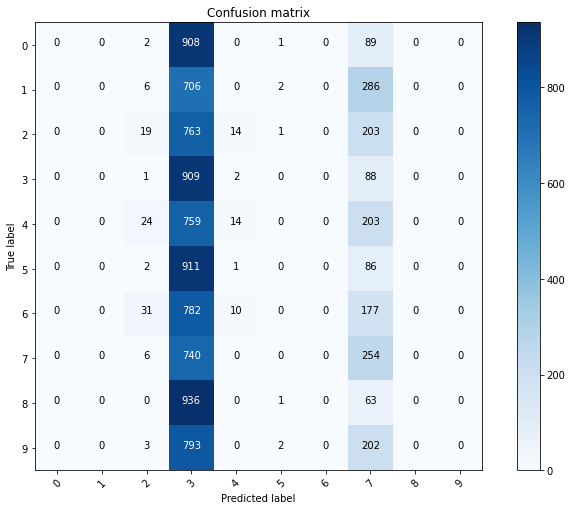

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test)
# cm = confusion_matrix(y_test, p_test)
cm = confusion_matrix(tf.math.argmax(y_test, axis=1), tf.math.argmax(p_test, axis=1))
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
from sklearn.metrics import f1_score
f1_score(tf.math.argmax(p_test, axis=1), tf.math.argmax(y_test, axis=1), average='macro')

In [ ]:
f1_score(tf.math.argmax(p_test, axis=1), tf.math.argmax(y_test, axis=1), average='micro')

In [ ]:
f1_score(tf.math.argmax(p_test, axis=1), tf.math.argmax(y_test, axis=1), average='weighted')

In [ ]:
# Calculae FLOPS
flops = get_flops(model, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")

In [ ]:
# def get_flops_from_model(model_h5_path):
#     session = tf.compat.v1.Session()
#     graph = tf.compat.v1.get_default_graph()
        

#     with graph.as_default():
#         with session.as_default():
#             model = tf.keras.models.load_model(model_h5_path)

#             run_meta = tf.compat.v1.RunMetadata()
#             opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
        
#             # We use the Keras session graph in the call to the profiler.
#             flops = tf.compat.v1.profiler.profile(graph=graph,
#                           run_meta=run_meta, cmd='op', options=opts)
        
#             return flops.total_float_ops

In [ ]:
models_dir = pathlib.Path(os.path.join('.', 'models'))
models_dir.mkdir(exist_ok=True, parents=True)

In [ ]:
model.save(os.path.join(models_dir, 'Mobilenet.h5'))

In [ ]:
# print(f"FLOPS: {get_flops_from_model(os.path.join(models_dir, 'Mobilenet.h5')) / 10 ** 9:.03} G")

In [ ]:
# model.summary()

quantization aware training(with no quanti)

Quantize some layers
Quantizing a model can have a negative effect on accuracy. You can selectively quantize layers of a model to explore the trade-off between accuracy, speed, and model size.

Your use case:

To deploy to a backend that only works well with fully quantized models (e.g. EdgeTPU v1, most DSPs), try "Quantize whole model".
Tips for better model accuracy:

It's generally better to finetune with quantization aware training as opposed to training from scratch.
Try quantizing the later layers instead of the first layers.
Avoid quantizing critical layers (e.g. attention mechanism).
In the example below, quantize only the Dense layers.

In [ ]:
# def apply_quantization_to_dense(layer):
#   if isinstance(layer, tf.keras.layers.Dense):
#     return tfmot.quantization.keras.quantize_annotate_layer(layer)
#   return layer

In [ ]:
# Use `tf.keras.models.clone_model` to apply `apply_quantization_to_dense` 
# to the layers of the model.
# annotated_model = tf.keras.models.clone_model(
#     model,
#     clone_function=apply_quantization_to_dense,
# )

# # Now that the Dense layers are annotated,
# # `quantize_apply` actually makes the model quantization aware.
# q_aware_model = tfmot.quantization.keras.quantize_apply(annotated_model)

# # `quantize_model` requires a recompile.
# q_aware_model.compile('sgd',
#               loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
#               metrics=['accuracy'])
# q_aware_model.summary()

In [ ]:
# history =q_aware_model.fit(train_generator.flow(x_train,y_train,batch_size=batch_size), 
#                            validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size), initial_epoch=50, epochs=55)

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('QAT model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['Training', 'Test'], loc='lower right')
# plt.show()

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('QAT model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['Training', 'Test'], loc='lower right')
# plt.show()

Convert model to TFlite

In [ ]:
models_dir = pathlib.Path(os.path.join('.', 'models'))
models_dir.mkdir(exist_ok=True, parents=True)

TFlite model

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.experimental_new_converter = True
tflite_model = converter.convert()
with open(os.path.join(models_dir, 'NASNetMobile.tflite'), 'wb') as f:
    f.write(tflite_model)

Dynamic range quantization (Post training quantization)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# converter.experimental_new_converter = True
# converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_dynamic_quant_model = converter.convert()
with open(os.path.join(models_dir, 'NASNetMobile_dynamic_quant.tflite'), 'wb') as f:
    f.write(tflite_dynamic_quant_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_dynamic_quant_model)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

Float16 quantization model (Post training quantization)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# converter.experimental_new_converter = True
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_fp16_quant_model = converter.convert()
with open(os.path.join(models_dir, 'NASNetMobile_fp16_quant.tflite'), 'wb') as f:
    f.write(tflite_fp16_quant_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_fp16_quant_model)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

Convert using dynamic range quantization

Convert using float fallback quantization
To quantize the variable data (such as model input/output and intermediates between layers), you need to provide a RepresentativeDataset. This is a generator function that provides a set of input data that's large enough to represent typical values. It allows the converter to estimate a dynamic range for all the variable data. (The dataset does not need to be unique compared to the training or evaluation dataset.) To support multiple inputs, each representative data point is a list and elements in the list are fed to the model according to their indices.

integer only quantization model (Post training quantization) int 8

In [ ]:
def representative_dataset():
  for data in tf.data.Dataset.from_tensor_slices((x_test)).batch(1).take(100):
    yield [tf.dtypes.cast(data, tf.float32)]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8,tf.lite.OpsSet.TFLITE_BUILTINS]
converter.inference_input_type = tf.uint8  # or tf.uint8
converter.inference_output_type = tf.uint8  # or tf.uint8
tflite_full_integer_quant_model = converter.convert()

with open(os.path.join(models_dir, 'NASNetMobile_integer_quant.tflite'), 'wb') as f:
    f.write(tflite_full_integer_quant_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_full_integer_quant_model)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

Integer quantization model (Quantization aware training)

In [ ]:
# #with tfmo.quantization.keras.quantize_scope():
# converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)

# converter.experimental_new_converter = True
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_q_aware_integer_quant_model = converter.convert()
# with open(os.path.join(models_dir, 'NASNetMobile_q_aware_integer_quant.tflite'), 'wb') as f:
#     f.write(tflite_q_aware_integer_quant_model)

test tflite model

In [ ]:
model_path = os.path.join(models_dir, 'NASNetMobile.tflite')
inference_tflite(model_path, int(num_test))

In [ ]:
convert_bytes(get_file_size(os.path.join(models_dir, 'NASNetMobile.tflite')),'MB')

integer only quantization model (Post training quantization) int 8

In [ ]:
model_path = os.path.join(models_dir, 'NASNetMobile_integer_quant.tflite')
inference_integer_tflite(model_path, int(num_test))

In [ ]:
convert_bytes(get_file_size(os.path.join(models_dir, 'NASNetMobile_integer_quant.tflite')),'MB')

dynamic range quantization (Post training quantization)

In [ ]:
model_path = os.path.join(models_dir, 'NASNetMobile_dynamic_quant.tflite')
inference_tflite(model_path, int(num_test))

In [ ]:
convert_bytes(get_file_size(os.path.join(models_dir, 'NASNetMobile_dynamic_quant.tflite')),'MB')

Float16 quantization model (Post training quantization)

In [ ]:
model_path = os.path.join(models_dir, 'NASNetMobile_fp16_quant.tflite')
inference_tflite(model_path, int(num_test))

In [ ]:
convert_bytes(get_file_size(os.path.join(models_dir, 'NASNetMobile_fp16_quant.tflite')),'MB')

Integer only: 16-bit activations with 8-bit weights (experimental)

In [ ]:
model_path = os.path.join(models_dir, 'NASNetMobile_integer_quant.tflite')
inference_integer_tflite(model_path, int(num_test))

In [ ]:
convert_bytes(get_file_size(os.path.join(models_dir, 'NASNetMobile_integer_quant.tflite')),'MB')

Integer quantization model (Quantization aware training)

In [ ]:
# model_path = os.path.join(models_dir, 'NASNetMobile_q_aware_integer_quant.tflite')
# inference_tflite(model_path, int(num_test))

In [ ]:
# convert_bytes(get_file_size(os.path.join(models_dir, 'NASNetMobile_q_aware_integer_quant.tflite')),'MB')

pruning and quantization

In [ ]:
# x,y = train_generator.next()
image = x_train[0]
label = y_train[0]
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

epochs = 5
validation_split = 0.25
num_images = image.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.10,
                                                               final_sparsity=0.300,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile('sgd',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# model_for_pruning.summary()

In [ ]:
print(num_images)

In [ ]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

history = model_for_pruning.fit(train_generator.flow(x_train,y_train,batch_size=batch_size), 
                                validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),
                                callbacks=callbacks,
                                epochs=5, shuffle=True)


In [ ]:
plt.plot(history.history['accuracy'])    #plot oringal model accuracy and loss
plt.plot(history.history['val_accuracy'])
plt.title('pruned model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Test'], loc='lower right')
plt.show()

In [ ]:
plt.plot(history.history['loss'])           #plot oringal model accuracy and loss
plt.plot(history.history['val_loss'])
plt.title('pruned model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Test'], loc='lower right')
plt.show()

In [ ]:
_, model_for_pruning_accuracy = model_for_pruning.evaluate(
   test_generator.flow(x_test,y_test,batch_size=1), verbose=1)

In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)


model_for_pruning.save(os.path.join(models_dir, 'NASNetMobile_prund.h5'))

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
pruned_tflite_model = converter.convert()

# _, pruned_tflite_file = tempfile.mkstemp('.tflite')
with open(os.path.join(models_dir, 'NASNetMobile_pruned.tflite'), 'wb') as f:
    f.write(pruned_tflite_model)

# print('Saved pruned TFLite model to:', pruned_tflite_file)

In [ ]:
model_path = os.path.join(models_dir, 'NASNetMobile_pruned.tflite')
inference_tflite(model_path, int(num_test))

In [ ]:
convert_bytes(get_file_size(os.path.join(models_dir, 'NASNetMobile_pruned.tflite')),'MB')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_and_pruned_tflite_model = converter.convert()

# _, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(os.path.join(models_dir, 'NASNetMobile_quant_and_pruned.tflite'), 'wb') as f:
    f.write(quantized_and_pruned_tflite_model)


# print('Saved quantized and pruned TFLite model to:', quantized_and_pruned_tflite_file)

# print("Size of gzipped baseline Keras model: %.2f bytes" %(get_gzipped_model_size(keras_file)))
# print("Size of gzipped pruned and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_pruned_tflite_file)))

In [ ]:
model_path = os.path.join(models_dir, 'NASNetMobile_quant_and_pruned.tflite')
inference_tflite(model_path, int(num_test))

In [ ]:
convert_bytes(get_file_size(os.path.join(models_dir, 'NASNetMobile_quant_and_pruned.tflite')),'MB')

In [ ]:
# Save keras model
model.save(os.path.join(models_dir, 'NASNetMobile.h5'))
# q_aware_model.save(os.path.join(models_dir, 'NASNetMobile_quant.h5'))
model_for_pruning.save(os.path.join(models_dir, 'NASNetMobile_pruned.h5'))

In [ ]:
convert_bytes(get_file_size(os.path.join(models_dir, 'NASNetMobile_pruned.h5')),'MB')

In [ ]:
# convert_bytes(get_file_size(os.path.join(models_dir, 'NASNetMobile_quant.h5')),'MB')

In [ ]:
convert_bytes(get_file_size(os.path.join(models_dir, 'NASNetMobile.h5')),'MB')

In [ ]:
get_gzipped_model_size(os.path.join(models_dir, 'NASNetMobile.h5'))

In [ ]:
# get_gzipped_model_size(os.path.join(models_dir, 'NASNetMobile_quant.h5'))

In [ ]:
get_gzipped_model_size(os.path.join(models_dir, 'NASNetMobile_pruned.h5'))